## Importing Important Librairies

In [213]:
import pandas as pd 
import numpy as np

# Visualisation libraries

import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
# To ignore warnings
import warnings 
warnings.filterwarnings('ignore')

### Reading dataset

In [214]:
data=pd.read_excel("Diabetes.xlsx")

In [215]:
data.head()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [216]:
data.shape

(768, 9)

In [217]:
data.nunique()

 Pregnancies                   17
Glucose                       136
Blood Pressure                 47
Skin Thickness                 51
Insulin                       186
BMI                           248
Diabetes Pedigree Function    517
Age                            52
Outcome                         2
dtype: int64

In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0    Pregnancies                768 non-null    int64  
 1   Glucose                     768 non-null    int64  
 2   Blood Pressure              768 non-null    int64  
 3   Skin Thickness              768 non-null    int64  
 4   Insulin                     768 non-null    int64  
 5   BMI                         768 non-null    float64
 6   Diabetes Pedigree Function  768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Outcome                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [219]:
data.describe(include="all")

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [220]:
for col in data.describe(include="all").columns:
    print(col)
    print(data[col].unique())
    print(' _'*20)

 Pregnancies
[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
Glucose
[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
Blood Pressure
[ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
Skin Thickness
[35 29  0 23 32 45 19 47 38 

- some of columns, a value of zero does not make sense and thus indicates missing value.

- Following columns or variables have zero value:

1. Glucose
2. BloodPressure
3. SkinThickness
4. Insulin
5. BMI
- It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with     suitable values

In [221]:
data[['Glucose','Blood Pressure','Skin Thickness','Insulin','BMI']] = data[['Glucose','Blood Pressure','Skin Thickness','Insulin','BMI']].replace(0,np.NaN)

In [222]:
data.isnull().sum()

 Pregnancies                    0
Glucose                         5
Blood Pressure                 35
Skin Thickness                227
Insulin                       374
BMI                            11
Diabetes Pedigree Function      0
Age                             0
Outcome                         0
dtype: int64

#### Mean values of the data

In [223]:
mean_value=data.mean()
mean_value

 Pregnancies                    3.845052
Glucose                       121.686763
Blood Pressure                 72.405184
Skin Thickness                 29.153420
Insulin                       155.548223
BMI                            32.457464
Diabetes Pedigree Function      0.471876
Age                            33.240885
Outcome                         0.348958
dtype: float64

### Filling null values with mean values

In [224]:
data=data.fillna(mean_value)

In [225]:
data.isnull().sum()

 Pregnancies                  0
Glucose                       0
Blood Pressure                0
Skin Thickness                0
Insulin                       0
BMI                           0
Diabetes Pedigree Function    0
Age                           0
Outcome                       0
dtype: int64

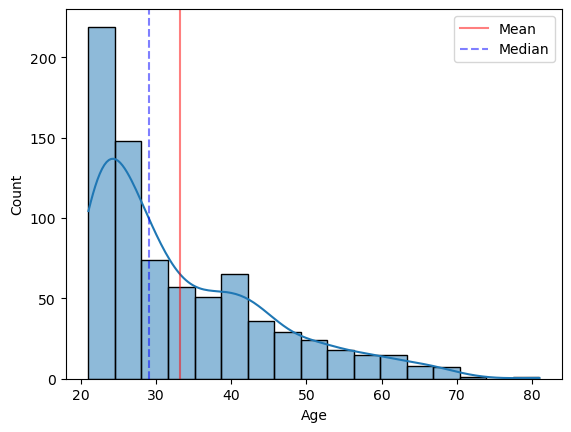

In [226]:
sns.histplot(data = data['Age'], kde = True)
plt.axvline(x=data.Age.mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=data.Age.median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()

- Here Age is mostly skewed (right skewed) so, for reducing skewness we have to transform, so it is right skewed so we go with Log Transformation

In [227]:
data["Age"]=np.log(data["Age"])

<Axes: xlabel='Age', ylabel='Density'>

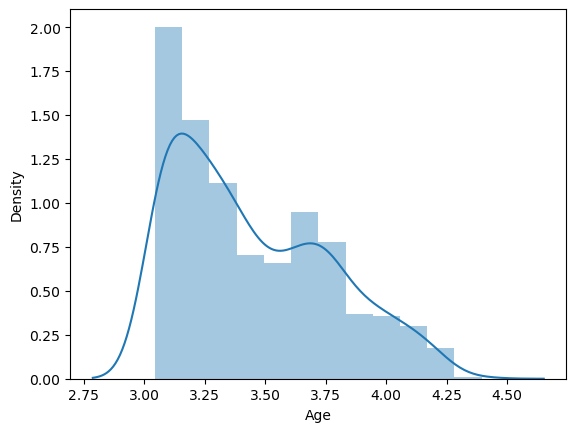

In [228]:
sns.distplot(data["Age"])

## EDA (Exploratory Data Analysis)

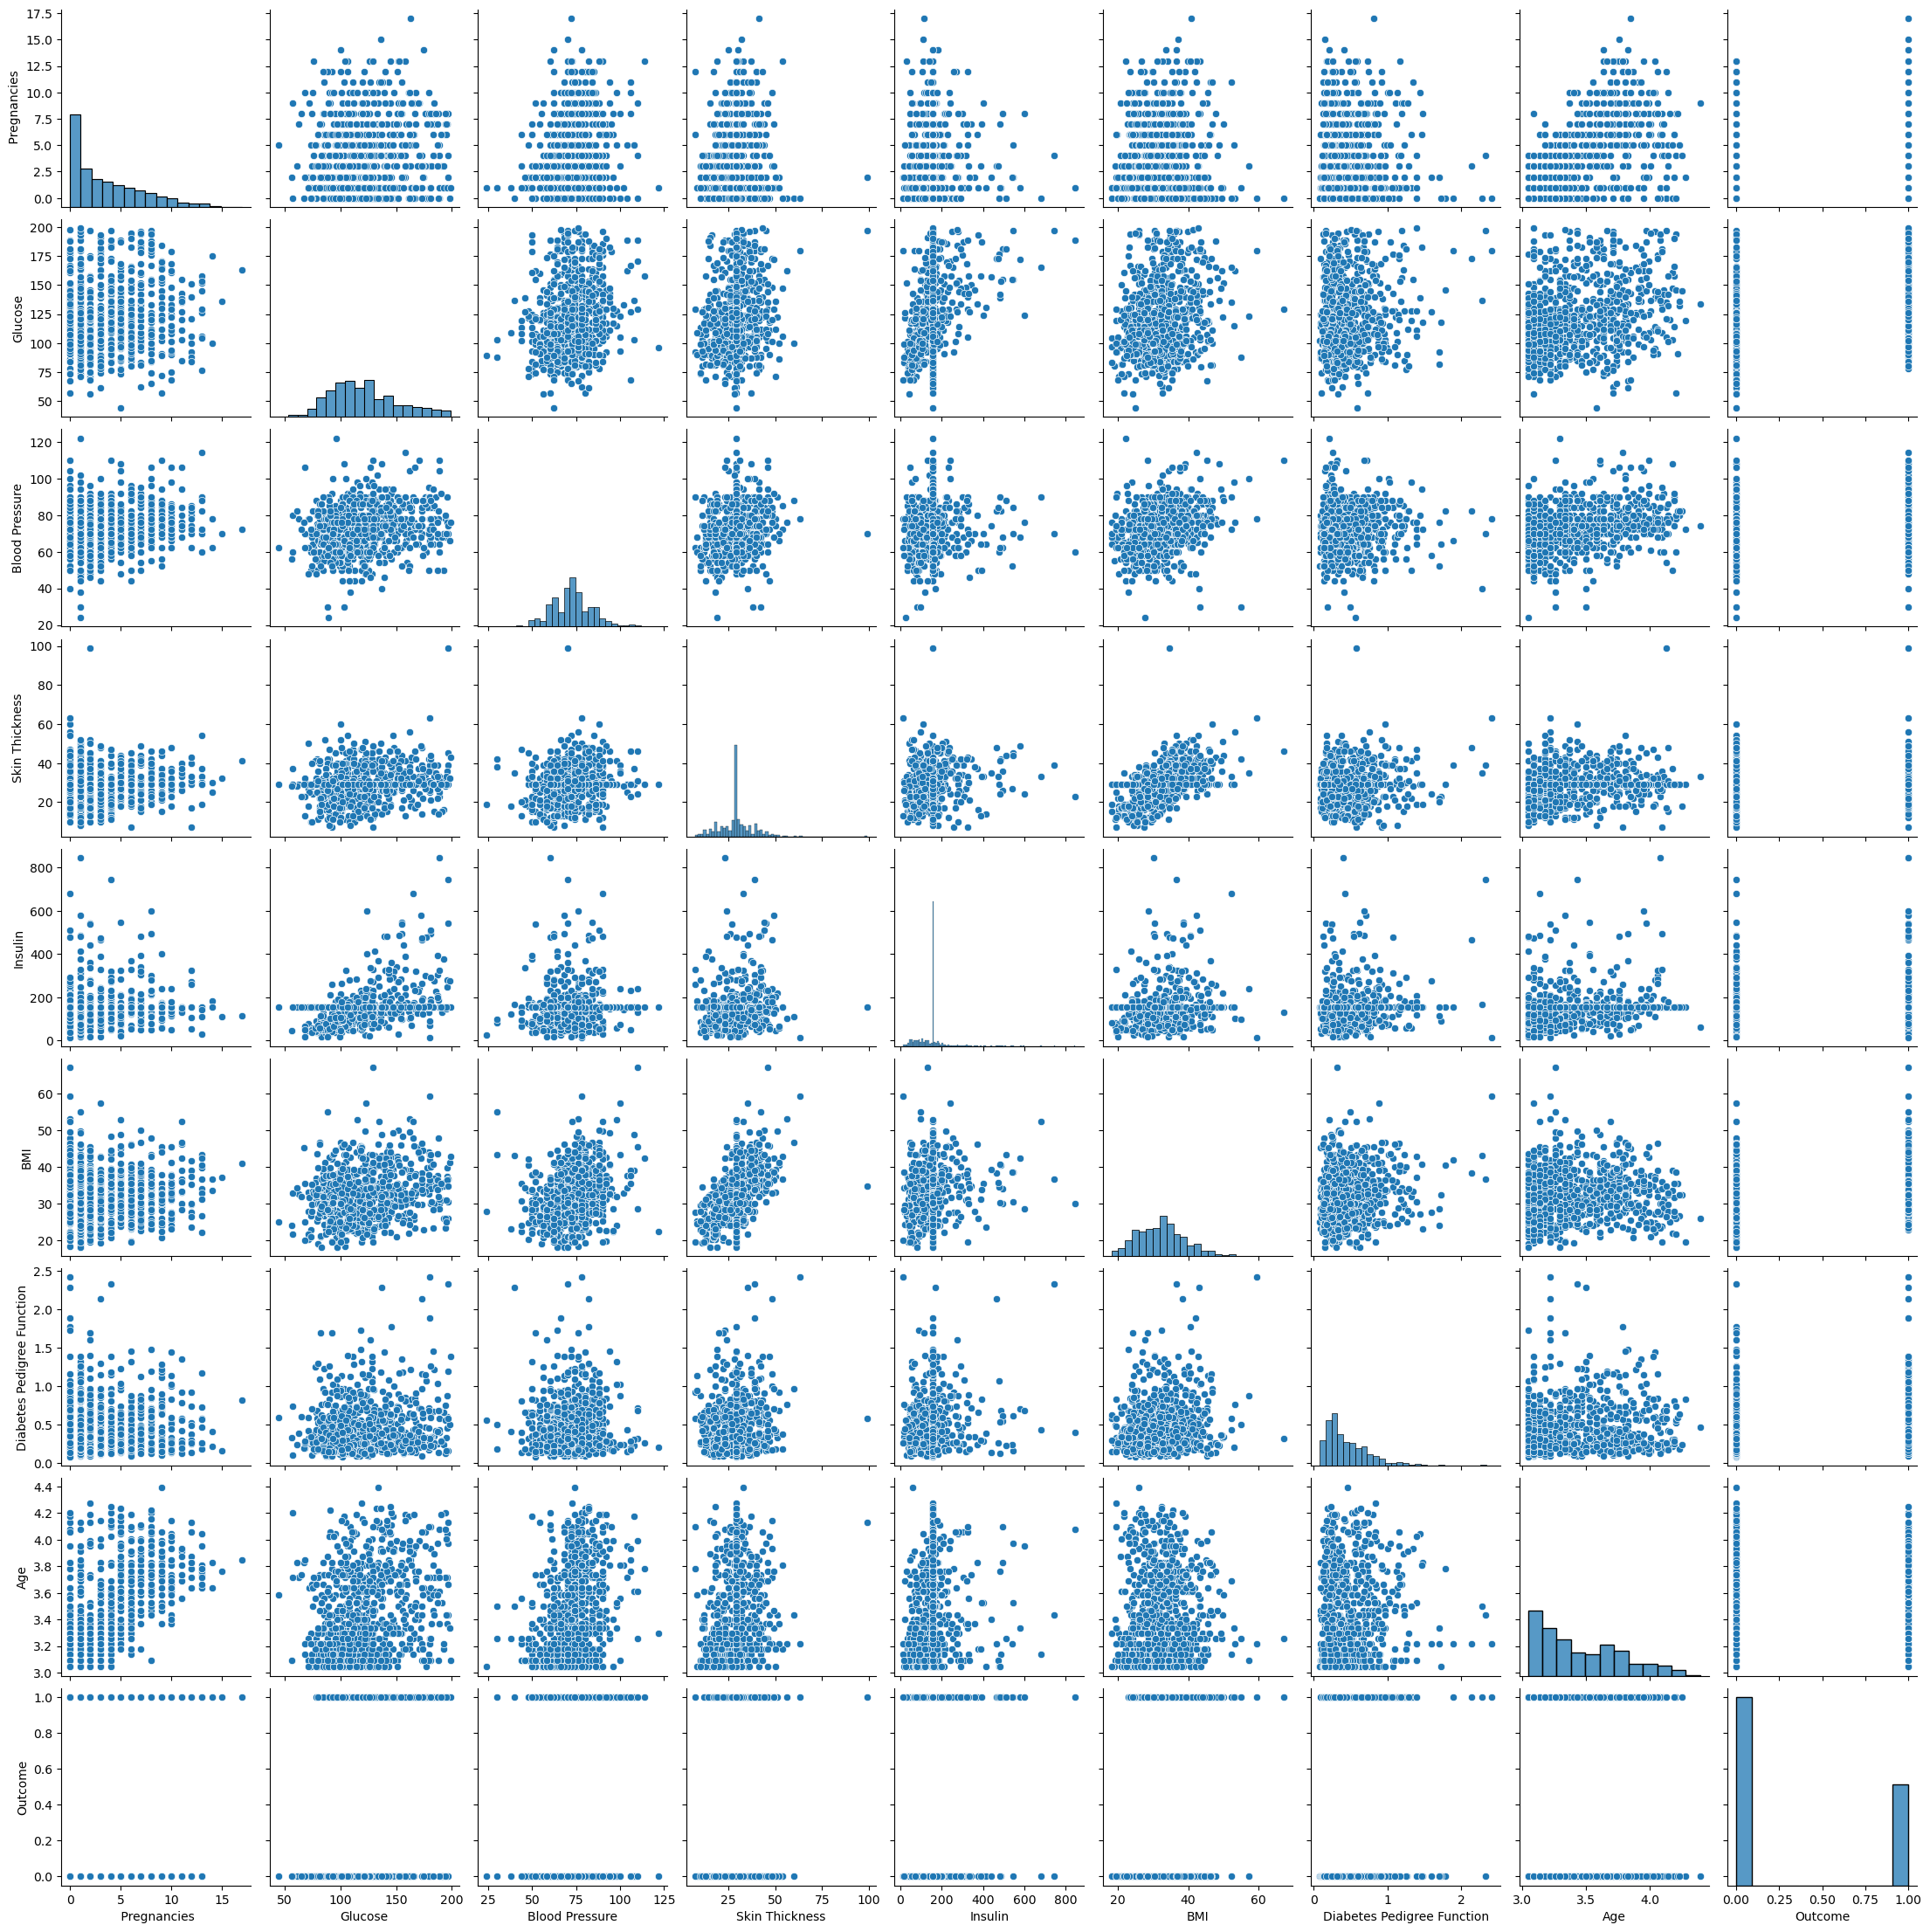

In [229]:
sns.pairplot(data)
plt.show()

array([[<Axes: title={'center': '\xa0Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'Blood Pressure'}>],
       [<Axes: title={'center': 'Skin Thickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Diabetes Pedigree Function'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

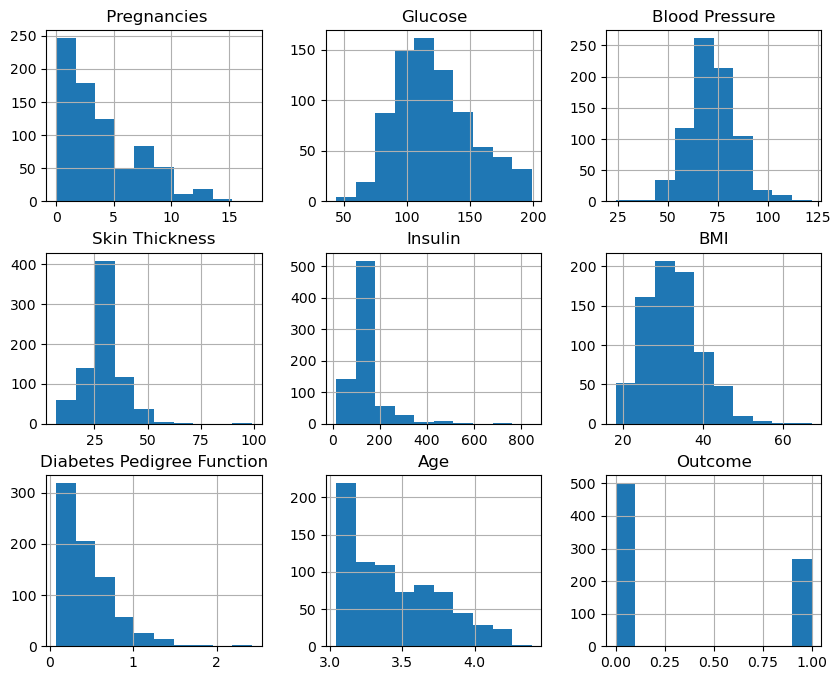

In [230]:
data.hist(figsize=(10,8))

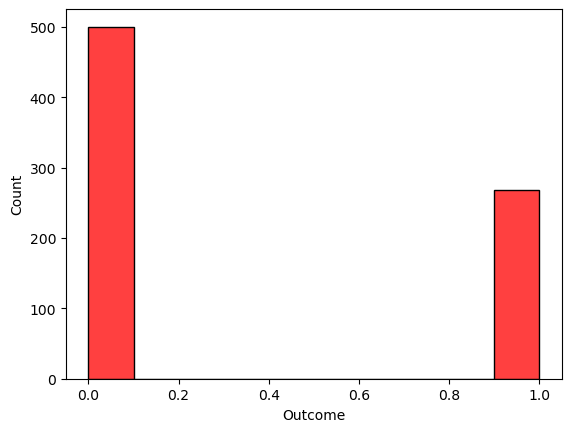

In [231]:
sns.histplot(data,x="Outcome",bins=10,color="red")
plt.show()

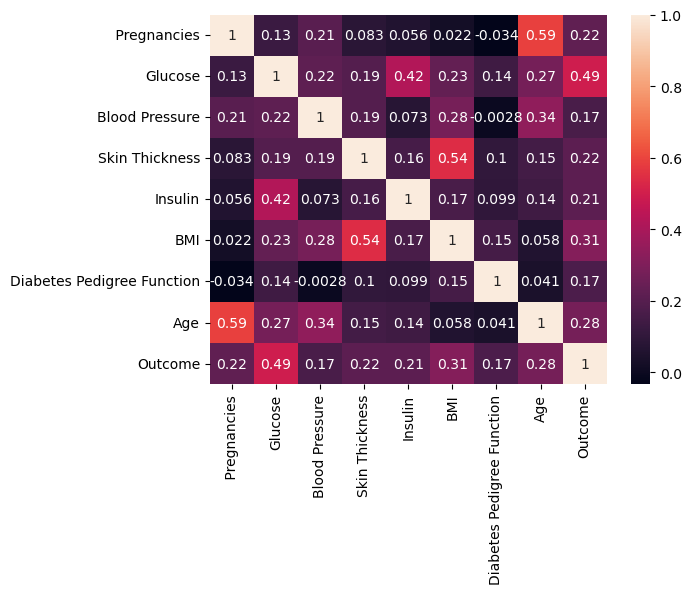

In [232]:
cor = data.corr()
sns.heatmap(cor,annot=True)
plt.show()

### Spliting the attributes in X and Y

In [233]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [234]:
x.head()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,3.912023
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,3.433987
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,3.465736
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,3.044522
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,3.496508


In [235]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

### Train_Test split import

In [236]:
from sklearn.model_selection import train_test_split

# random state train test split will be same with all people using random_state=16
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=16)

In [237]:
X_train.head()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age
695,7,142.0,90.0,24.00000,480.000000,30.4,0.128,3.761200
119,4,99.0,76.0,15.00000,51.000000,23.2,0.223,3.044522
135,2,125.0,60.0,20.00000,140.000000,33.8,0.088,3.433987
675,6,195.0,70.0,29.15342,155.548223,30.9,0.328,3.433987
326,1,122.0,64.0,32.00000,156.000000,35.1,0.692,3.401197


In [238]:
X_test.head()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age
515,3,163.0,70.0,18.00000,105.000000,31.600000,0.268,3.332205
462,8,74.0,70.0,40.00000,49.000000,35.300000,0.705,3.663562
55,1,73.0,50.0,10.00000,155.548223,23.000000,0.248,3.044522
684,5,136.0,82.0,29.15342,155.548223,32.457464,0.640,4.234107
383,1,90.0,62.0,18.00000,59.000000,25.100000,1.268,3.218876


### Transformation (StandardScaler)

In [239]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler

StandardScaler()

In [240]:
X_train=scaler.fit_transform(X_train)
X_train

array([[ 0.96481636,  0.66557769,  1.47411024, ..., -0.32548106,
        -1.04882357,  1.02083451],
       [ 0.06216196, -0.73972773,  0.29529685, ..., -1.35760933,
        -0.75837571, -1.26519555],
       [-0.53960763,  0.10999183, -1.05191845, ...,  0.16191284,
        -1.1711174 , -0.02289627],
       ...,
       [ 0.66393156, -0.34754947, -0.71511463, ...,  0.2192533 ,
        -0.64525391, -0.83926241],
       [ 1.56658596,  1.38457116,  0.9689045 , ..., -0.26814061,
         1.10049059,  0.07837447],
       [-1.14137723,  1.31920812,  0.29529685, ...,  2.42686098,
        -0.32728994, -0.58394535]])

In [241]:
X_test=scaler.fit_transform(X_test)
X_test

array([[-0.28644595,  1.37820104, -0.16865281, ..., -0.03356925,
        -0.60177039, -0.40197147],
       [ 1.1457838 , -1.60214563, -0.16865281, ...,  0.53538313,
         0.6726098 ,  0.5527794 ],
       [-0.85933785, -1.63563267, -1.74346185, ..., -1.35599913,
        -0.66009443, -1.23087986],
       ...,
       [-0.28644595,  0.9428695 ,  0.3037899 , ..., -1.66354096,
        -0.77965871,  0.40109518],
       [-1.1457838 ,  0.80892134,  0.77623261, ...,  1.33499189,
         3.81044295,  0.90034903],
       [-0.5728919 ,  0.2061546 ,  0.46127081, ...,  1.76555046,
         2.18611854, -0.10870144]])

# Building Algorithms

## 1. Logistic Regression

In [242]:
# Importing LogisticRegression
from sklearn.linear_model import LogisticRegression
# Creating logistic regression Object
log_reg=LogisticRegression(random_state=0)

In [243]:
# Passing independent and dependent training data to the model
log_reg.fit(X_train,y_train)

LogisticRegression(random_state=0)

### Prediction

In [244]:
log_reg_pred=log_reg.predict(X_test)
log_reg_pred

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [245]:
# Importing libraries for the accuracy and more

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, fbeta_score
from sklearn.metrics import f1_score

In [246]:
confusion_mat=confusion_matrix(y_test, log_reg_pred)
confusion_mat

array([[114,  11],
       [ 26,  41]], dtype=int64)

#### Confusion matrix tells how good or bad the model is.

- Here important is TP(True Positive) and TN(True Negative) should be higher.

In [247]:
print("Accuracy of precision : ",round(precision_score(y_test, log_reg_pred), 2))

Accuracy of precision :  0.79


In [248]:
print("Accuracy of Recall Score",round(recall_score(y_test, log_reg_pred),2))

Accuracy of Recall Score 0.61


In [249]:
print("Accuracy of F1 Score : ",round(f1_score(y_test, log_reg_pred),2))

Accuracy of F1 Score :  0.69


#### To checking accuracy using accuracy_score

In [250]:
print(round(accuracy_score(y_test, log_reg_pred), 2))

0.81


#### **Insights**:
- We can see here that the accuracy from Logistic Regression model is 81%.
- Now let us check with another one models too.

## 2. Decision Tree

In [251]:
# Importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
# Create Decisiom Tree Classifier Object
classifier=DecisionTreeClassifier()

In [252]:
# Train Decision Tree Classifier
classifier=classifier.fit(X_train,y_train)
classifier

DecisionTreeClassifier()

### Prediction

In [253]:
prediction=classifier.predict(X_test)
prediction

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [254]:
# Importing scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn import tree

In [255]:
print("Decision tree training set accuracy : ",classifier.score(X_train,y_train))
print("Decision tree test set accuracy :",classifier.score(X_test,y_test))

Decision tree training set accuracy :  1.0
Decision tree test set accuracy : 0.703125


#### Accuracy Checking for Decision Tree

In [270]:
print("Accuracy score by Decision tree : ",round(accuracy_score(y_test, prediction), 2))

Accuracy score by Decision tree :  0.7


#### Insights : 
- In Decision Tree Algorithm, we can see that Accuracy is 70%

## 3. Random Forest Classifier

In [257]:
# Importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest Classifier
classifier=RandomForestClassifier(n_estimators=10,criterion="entropy")  # entropy gives range b/w 0-1

In [258]:
# Train Random Forest Classifier
classifier=classifier.fit(X_train,y_train)
classifier

RandomForestClassifier(criterion='entropy', n_estimators=10)

### Prediction 

In [259]:
forest_pred=classifier.predict(X_test)
forest_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1], dtype=int64)

In [260]:
#Creating the Confusion matrix
confusion_mat=confusion_matrix(y_test,forest_pred)
confusion_mat

array([[107,  18],
       [ 25,  42]], dtype=int64)

#### Accuracy Checking for random forest

In [261]:
print("Accuracy of Random Forest Model : ",round(accuracy_score(y_test, forest_pred), 2))

Accuracy of Random Forest Model :  0.78


#### Insights : 
- In Random Forest Algorithm, we can see that Accuracy is 78%

## 4. XG Boost 

In [262]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [263]:
# Importing xg boost
import xgboost as xgb

In [264]:
# Creating XGBoost classifier

xgb_classifier = xgb.XGBClassifier(
    n_estimators=100,  # Number of boosting rounds (trees)
    max_depth=3,        # Maximum depth of each tree
    learning_rate=0.1,  # Step size shrinkage to prevent overfitting
    subsample=0.8,      # Fraction of samples used for fitting the trees
    colsample_bytree=0.8,  # Fraction of features used for fitting the trees
    random_state=42
)

In [265]:
# Train the XGBoost Classifier

xgb_classifier=xgb_classifier.fit(X_train, y_train)
xgb_classifier

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [266]:
xgb_pred = xgb_classifier.predict(X_test)
xgb_pred

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1])

#### Accuraccy checking for XG Boost Classifier

In [267]:
print("Accuracy of XGBoost Model : ",round(accuracy_score(y_test, xgb_pred), 2))

Accuracy of XGBoost Model :  0.79


#### Insights : 
- In XGBoost Algorithm, we can see that Accuracy is 79%.

# Conclusion :

- After testing data from different algorithm. I have came to the conclusion that **Logistic Regression** gives us the Highest accuracy i.e. 81% and the rest **Decision Tree algorithm** gives 70%, **Random Forest algorithm** gives 78% and **XGBoost** gives us an accuracy of 79%. So according to me **Logistic Regression** is best for the prediction.